## Function Arguments and  Mutability

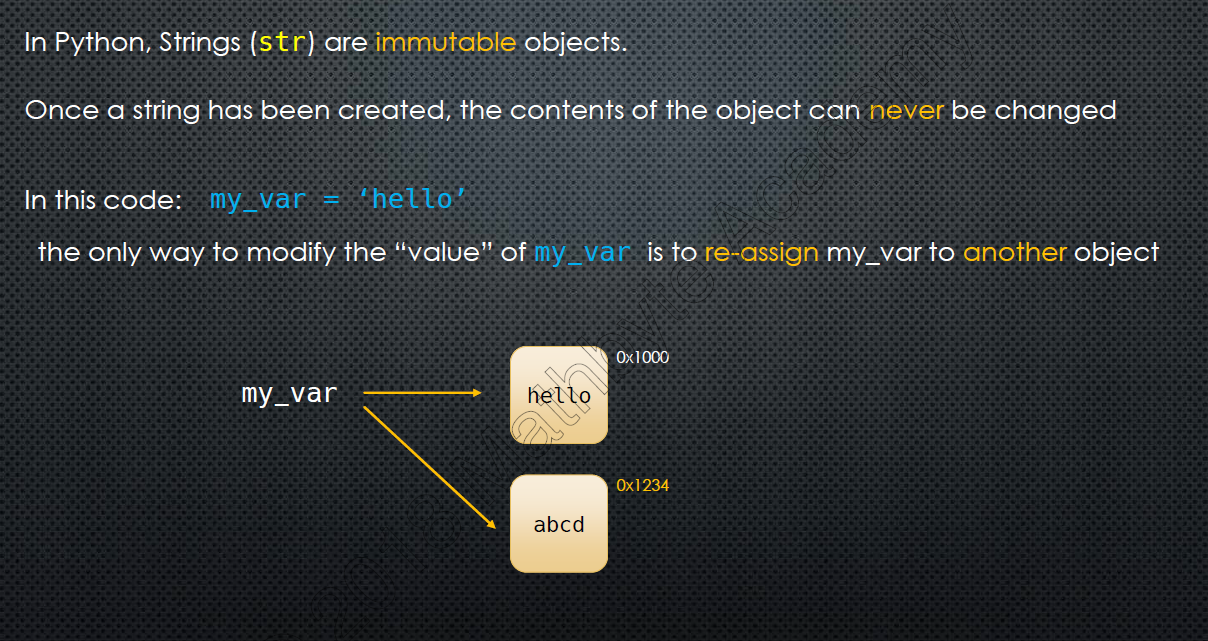

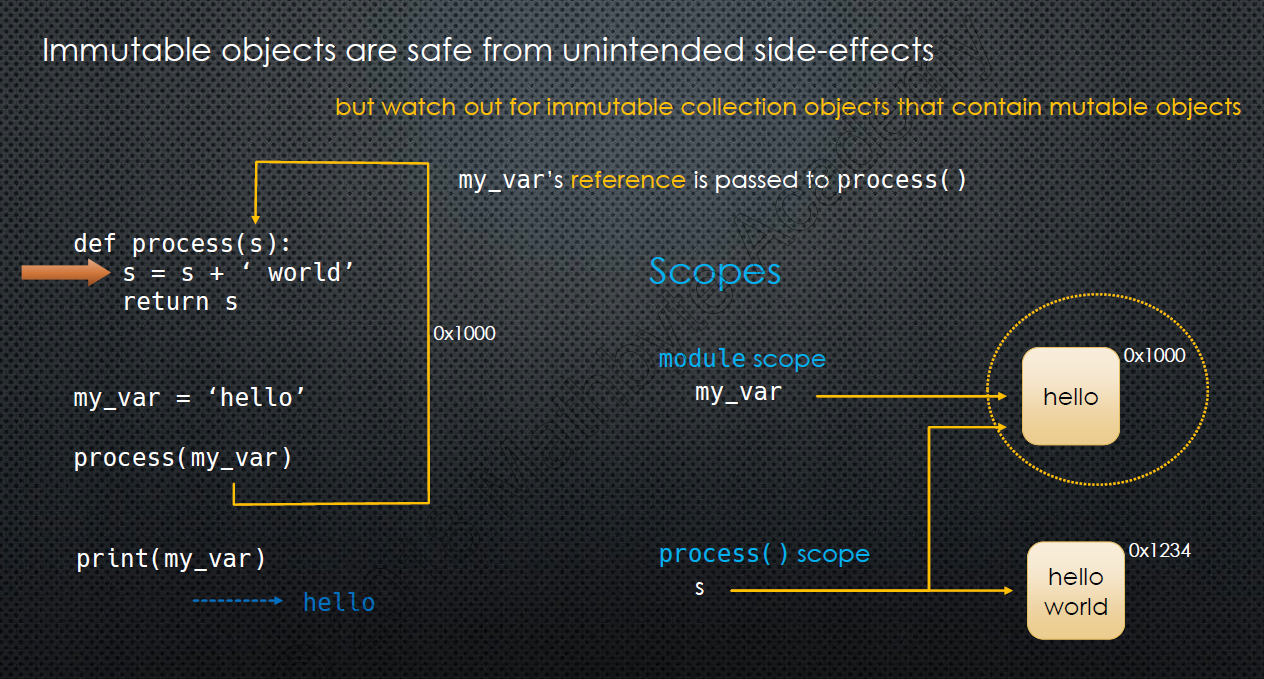

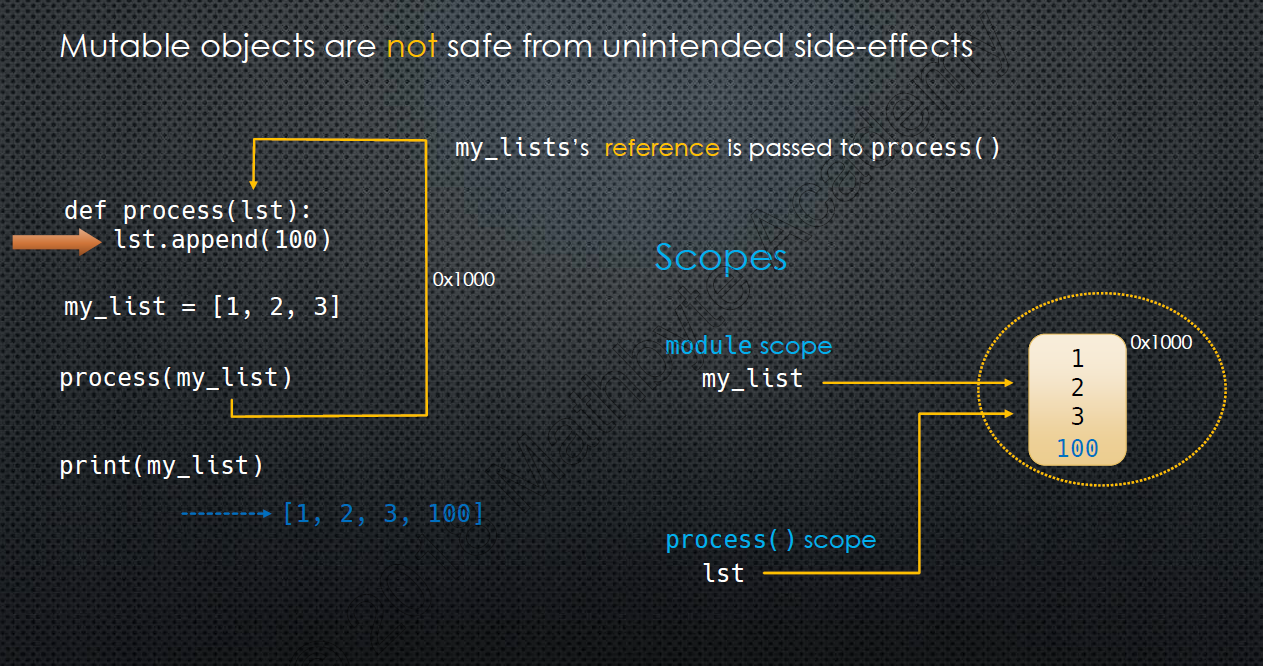

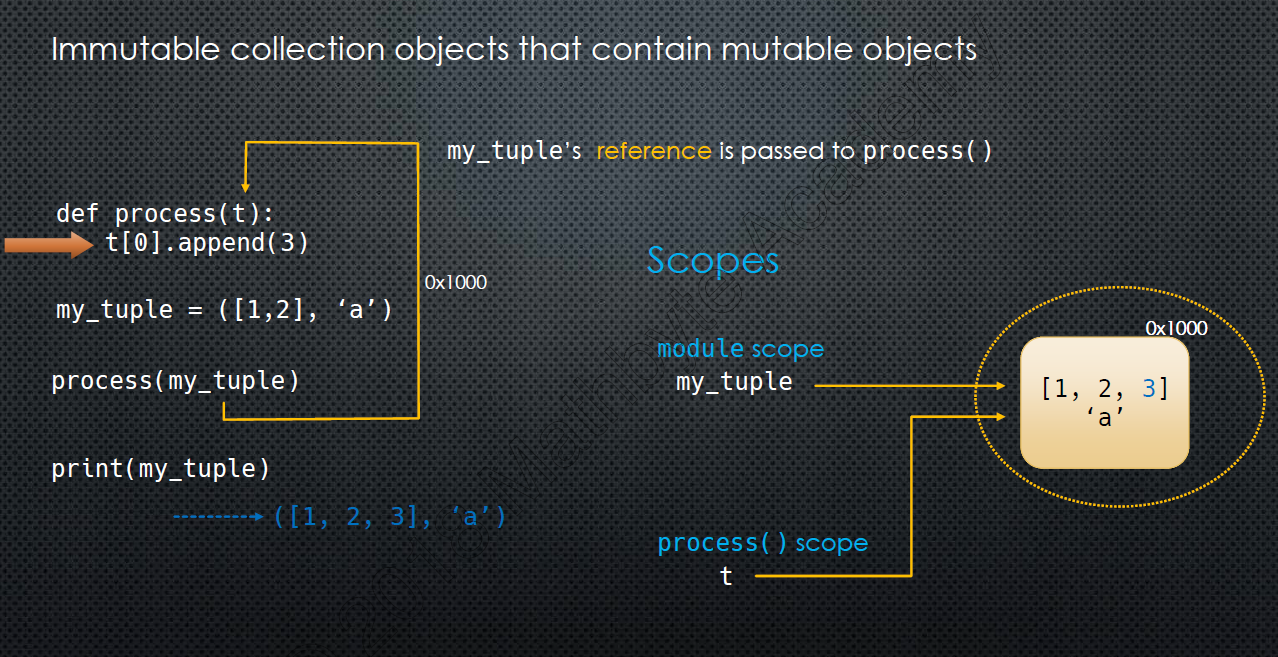

Consider a function that receives a *string* argument, and changes the argument in some way:

In [1]:
def process(s):
    print('initial s # = {0}'.format(hex(id(s))))
    s = s + ' world'
    print('s after change # = {0}'.format(hex(id(s))))

In [2]:
my_var = 'hello'
print('my_var # = {0}'.format(hex(id(my_var))))

my_var # = 0x1e7e96fc420


Note that when *s* is received, it is referencing the same object as *my_var*.

After we "modify" *s*, *s* is pointing to a new memory address:

In [3]:
process(my_var)

initial s # = 0x1e7e96fc420
s after change # = 0x1e7e97153b0


And our own variable *my_var* is still pointing to the original memory address:

In [4]:
print('my_var # = {0}'.format(hex(id(my_var))))

my_var # = 0x1e7e96fc420


Let's see how this works with mutable objects:

In [5]:
def modify_list(items):
    print('initial items # = {0}'.format(hex(id(items))))
    if len(items) > 0:
        items[0] = items[0] ** 2
    items.pop()
    items.append(5)
    print('final items # = {0}'.format(hex(id(items))))

In [6]:
my_list = [2, 3, 4]
print('my_list # = {0}'.format(hex(id(my_list))))

my_list # = 0x1e7e972d308


In [7]:
modify_list(my_list)

initial items # = 0x1e7e972d308
final items # = 0x1e7e972d308


In [8]:
print(my_list)
print('my_list # = {0}'.format(hex(id(my_list))))

[4, 3, 5]
my_list # = 0x1e7e972d308


As you can see, throughout all the code, the memory address referenced by *my_list* and *items* is always the **same** (shared) reference - we are simply modifying the contents (**internal state**) of the object at that memory address.

Now, even with immutable container objects we have to be careful, e.g. a tuple containing a list (the tuple is immutable, but the list element inside the tuple **is** mutable)

In [9]:
def modify_tuple(t):
    print('initial t # = {0}'.format(hex(id(t))))
    t[0].append(100)
    print('final t # = {0}'.format(hex(id(t))))

In [10]:
my_tuple = ([1, 2], 'a')

In [11]:
hex(id(my_tuple))

'0x1e7e9614288'

In [12]:
modify_tuple(my_tuple)

initial t # = 0x1e7e9614288
final t # = 0x1e7e9614288


In [13]:
my_tuple

([1, 2, 100], 'a')

As you can see, the first element of the tuple was mutated.